##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [3]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2021` by default to prevent Colab instance timeouts from deleting your edits.

import os
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cs285_f2021'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cs285_f2021'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [5]:
!pip install free-mujoco-py

     |████████████████████████████████| 14.1 MB 7.9 MB/s 
     |████████████████████████████████| 203 kB 31.1 MB/s 
     |████████████████████████████████| 3.3 MB 32.1 MB/s 
     |████████████████████████████████| 4.3 MB 37.1 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [6]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

!pip install opencv-python==4.4.0.42

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 https://developer.download.nvidia.com/compute/c

Ensure your `mjkey.txt` is in /content/cs285_f2021/mujoco before this step

In [ ]:
#@title clone homework repo

import os
%cd $SYM_PATH
%ls
!rm -r VVV
!git clone https://github.com/RyanBelkhir/VVV.git 
%cd VVV/hw3
%pip install -r requirements_colab.txt
%pip install -e .
os.kill(os.getpid(), 9)

/content/gdrive/My Drive/cs285_f2021
homework_fall2021/  hw1/  mujoco/  VVV/
Cloning into 'VVV'...
remote: Enumerating objects: 706, done.
remote: Counting objects: 100% (706/706), done.
remote: Compressing objects: 100% (650/650), done.
remote: Total 706 (delta 324), reused 306 (delta 48), pack-reused 0
Receiving objects: 100% (706/706), 9.24 MiB | 10.54 MiB/s, done.
Resolving deltas: 100% (324/324), done.
Checking out files: 100% (207/207), done.
/content/gdrive/My Drive/cs285_f2021/VVV/hw3
     |████████████████████████████████| 1.6 MB 8.3 MB/s 
     |████████████████████████████████| 6.8 MB 34.4 MB/s 
     |████████████████████████████████| 216 kB 52.8 MB/s 
     |████████████████████████████████| 12.6 MB 12.5 MB/s 
     |████████████████████████████████| 750 kB 45.4 MB/s 
     |████████████████████████████████| 398 kB 39.2 MB/s 
     |████████████████████████████████| 753.2 MB 15 kB/s 
     |████████████████████████████████| 448 kB 44.0 MB/s 
     |████████████████████████████████

Obtaining file:///content/gdrive/MyDrive/cs285_f2021/VVV/hw3
  Running setup.py develop for cs285


In [1]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

# For later
from cs285.infrastructure.colab_utils import (
    wrap_env,
    show_video
)

In [2]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import matplotlib
matplotlib.use('Agg')

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(10):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
      break;
            
env.close()
print('Loading video...')
show_video()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platf

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cs285_f2021/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Actor Critic

In [3]:
#@title imports
import os
import time

from cs285.agents.ac_agent import ACAgent
from cs285.infrastructure.rl_trainer import RL_Trainer

In [4]:
#@title runtime arguments

class ACArgs:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  def __contains__(self, key):
    return hasattr(self, key)

  env_name = 'CartPole-v0' #@param ['CartPole-v0', 'InvertedPendulum-v2', 'HalfCheetah-v2']
  exp_name = 'q4_ac' #@param

  ## PDF will tell you how to set ep_len
  ## and discount for each environment
  ep_len = 200 #@param {type: "integer"}

  #@markdown batches and steps
  batch_size = 1000 #@param {type: "integer"}
  eval_batch_size =  400#@param {type: "integer"}

  n_iter = 100 #@param {type: "integer"}
  num_agent_train_steps_per_iter = 1 #@param {type: "integer"}
  num_actor_updates_per_agent_update = 1 #@param {type: "integer"}
  num_critic_updates_per_agent_update = 1 #@param {type: "integer"}
  
  #@markdown Actor-Critic parameters
  discount =  0.9#@param {type: "number"}
  learning_rate = 5e-3 #@param {type: "number"}
  dont_standardize_advantages = False #@param {type: "boolean"}
  num_target_updates = 10 #@param {type: "integer"}
  num_grad_steps_per_target_update = 10 #@param {type: "integer"}
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}

  #@markdown system
  save_params = False #@param {type: "boolean"}
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}

  #@markdown logging
  ## default is to not log video so
  ## that logs are small enough to be
  ## uploaded to gradscope
  video_log_freq =  -1#@param {type: "integer"}
  scalar_log_freq = 10 #@param {type: "integer"}


args = ACArgs()


if args['video_log_freq'] > 0:
  import warnings
  warnings.warn(
      '''\nLogging videos will make eventfiles too'''
      '''\nlarge for the autograder. Set video_log_freq = -1'''
      '''\nfor the runs you intend to submit.''')

In [5]:
#@title Define AC trainer

class AC_Trainer(object):

    def __init__(self, params):

        #####################
        ## SET AGENT PARAMS
        #####################

        computation_graph_args = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            'num_target_updates': params['num_target_updates'],
            'num_grad_steps_per_target_update': params['num_grad_steps_per_target_update'],
            }

        estimate_advantage_args = {
            'gamma': params['discount'],
            'standardize_advantages': not(params['dont_standardize_advantages']),
        }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
            'num_critic_updates_per_agent_update': params['num_critic_updates_per_agent_update'],
            'num_actor_updates_per_agent_update': params['num_actor_updates_per_agent_update'],
        }

        agent_params = {**computation_graph_args, **estimate_advantage_args, **train_args}

        self.params = params
        self.params['agent_class'] = ACAgent
        self.params['agent_params'] = agent_params
        self.params['train_batch_size'] = params['batch_size']
        self.params['batch_size_initial'] = self.params['batch_size']
        self.params['non_atari_colab_env'] = True

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):

        self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
            )


In [6]:
#@title create directories for logging

data_path = '''/content/cs285_f2021/''' \
        '''homework_fall2021/hw3/data'''

if not (os.path.exists(data_path)):
    os.makedirs(data_path)

logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

print("LOGGING TO: ", logdir)

LOGGING TO:  /content/cs285_f2021/homework_fall2021/hw3/data/q4_ac_CartPole-v0_24-02-2022_17-07-12


In [ ]:
#@title run training
trainer = AC_Trainer(args)
trainer.run_training_loop()

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

## requires tensorflow==2.3.0
# %load_ext tensorboard
%tensorboard --logdir /content/cs285_f2021/homework_fall2021/hw3/data/

In [7]:
%cd cs285_f2021/VVV/hw3

/content/gdrive/My Drive/cs285_f2021/VVV/hw3


# Question 4: Sanity check with cartpole

In [12]:
!python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_ac_1_1 -ntu 1 -ngsptu 1




LOGGING TO:  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/q4_ac_1_1_CartPole-v0_24-02-2022_17-11-27 



########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/q4_ac_1_1_CartPole-v0_24-02-2022_17-11-27
########################
Using GPU id 0


********** Iteration 0 ************


Training agent...

Beginning logging procedure...

Eval_AverageReturn : 25.235294342041016
Eval_StdReturn : 11.694792747497559
Eval_MaxReturn : 54.0
Eval_MinReturn : 12.0
Eval_AverageEpLen : 25.235294117647058
Train_AverageReturn : 27.648649215698242
Train_StdReturn : 12.643160820007324
Train_MaxReturn : 65.0
Train_MinReturn : 11.0
Train_AverageEpLen : 27.64864864864865
Train_EnvstepsSoFar : 1023
TimeSinceStart : 1.2238709926605225
Critic_Loss : 1.0069358348846436
Actor_Loss : -6.161799430847168
Initial_DataCollection_AverageReturn : 27.648649215698242
Done logging...




********** Iteration 1 ************


Training agent..

------------------------------------------------------------------------

In [13]:
!python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_100_1 -ntu 100 -ngsptu 1 -dir q4




LOGGING TO:  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/data/q4/q4_100_1_CartPole-v0_24-02-2022_17-13-07 



########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/data/q4/q4_100_1_CartPole-v0_24-02-2022_17-13-07
########################
Using GPU id 0


********** Iteration 0 ************


Training agent...

Beginning logging procedure...

Eval_AverageReturn : 29.14285659790039
Eval_StdReturn : 21.346988677978516
Eval_MaxReturn : 103.0
Eval_MinReturn : 12.0
Eval_AverageEpLen : 29.142857142857142
Train_AverageReturn : 27.648649215698242
Train_StdReturn : 12.643160820007324
Train_MaxReturn : 65.0
Train_MinReturn : 11.0
Train_AverageEpLen : 27.64864864864865
Train_EnvstepsSoFar : 1023
TimeSinceStart : 1.4171359539031982
Critic_Loss : 10.573397636413574
Actor_Loss : -23.988285064697266
Initial_DataCollection_AverageReturn : 27.648649215698242
Done logging...




********** Iteration 1 ************


T

In [14]:
!python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_1_100 -ntu 1 -ngsptu 100 -dir q4




LOGGING TO:  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/data/q4/q4_1_100_CartPole-v0_24-02-2022_17-15-12 



########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/data/q4/q4_1_100_CartPole-v0_24-02-2022_17-15-12
########################
Using GPU id 0


********** Iteration 0 ************


Training agent...

Beginning logging procedure...

Eval_AverageReturn : 22.63157844543457
Eval_StdReturn : 13.955608367919922
Eval_MaxReturn : 67.0
Eval_MinReturn : 9.0
Eval_AverageEpLen : 22.63157894736842
Train_AverageReturn : 27.648649215698242
Train_StdReturn : 12.643160820007324
Train_MaxReturn : 65.0
Train_MinReturn : 11.0
Train_AverageEpLen : 27.64864864864865
Train_EnvstepsSoFar : 1023
TimeSinceStart : 1.39912748336792
Critic_Loss : 0.0019927702378481627
Actor_Loss : -1.416243553161621
Initial_DataCollection_AverageReturn : 27.648649215698242
Done logging...




********** Iteration 1 ************


Trai

In [15]:
!python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v0 -n 100 -b 1000 --exp_name q4_10_10 -ntu 10 -ngsptu 10 -dir data/q4




LOGGING TO:  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/data/q4/q4_10_10_CartPole-v0_24-02-2022_17-17-04 



########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/data/q4/q4_10_10_CartPole-v0_24-02-2022_17-17-04
########################
Using GPU id 0


********** Iteration 0 ************


Training agent...

Beginning logging procedure...

Eval_AverageReturn : 40.5
Eval_StdReturn : 44.75768280029297
Eval_MaxReturn : 160.0
Eval_MinReturn : 12.0
Eval_AverageEpLen : 40.5
Train_AverageReturn : 27.648649215698242
Train_StdReturn : 12.643160820007324
Train_MaxReturn : 65.0
Train_MinReturn : 11.0
Train_AverageEpLen : 27.64864864864865
Train_EnvstepsSoFar : 1023
TimeSinceStart : 1.3798327445983887
Critic_Loss : 2.195937156677246
Actor_Loss : -29.27524185180664
Initial_DataCollection_AverageReturn : 27.648649215698242
Done logging...




********** Iteration 1 ************


Training agent...


********** 

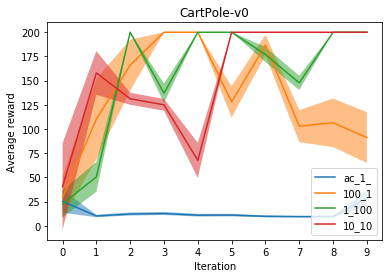

In [16]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import more_itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

expname = "CartPole-v0"
ax = plt.figure().gca()
dir = "data/q4"
iters = list(range(10))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[3:8]
    plt.errorbar(steps, avg_return_steps, label=Label)
    plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Learning curves for small batch experiment")

# Question 5: Run actor-critic with more difficult tasks

In [17]:
!python cs285/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v2 --ep_len 100 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_10_10 -ntu 10 -ngsptu 10 -dir q5




LOGGING TO:  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/q5/q5_10_10_InvertedPendulum-v2_24-02-2022_17-21-47 



########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/q5/q5_10_10_InvertedPendulum-v2_24-02-2022_17-21-47
########################
Using GPU id 0


********** Iteration 0 ************


Training agent...

Beginning logging procedure...

Eval_AverageReturn : 15.65384578704834
Eval_StdReturn : 12.763958930969238
Eval_MaxReturn : 55.0
Eval_MinReturn : 6.0
Eval_AverageEpLen : 15.653846153846153
Train_AverageReturn : 8.510204315185547
Train_StdReturn : 5.211339473724365
Train_MaxReturn : 40.0
Train_MinReturn : 3.0
Train_AverageEpLen : 8.510204081632653
Train_EnvstepsSoFar : 5004
TimeSinceStart : 5.012554883956909
Critic_Loss : 1.0860847234725952
Actor_Loss : -726.0421752929688
Initial_DataCollection_AverageReturn : 8.510204315185547
Done logging...




********** Iteration 1 ************


Tra

In [18]:
!python cs285/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v2 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_10_10 -ntu 10 -ngsptu 10 -dir q5




LOGGING TO:  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/q5/q5_10_10_HalfCheetah-v2_24-02-2022_17-29-28 



########################
logging outputs to  /content/gdrive/MyDrive/cs285_f2021/VVV/hw3/cs285/scripts/../../data/q5/q5_10_10_HalfCheetah-v2_24-02-2022_17-29-28
########################
Using GPU id 0


********** Iteration 0 ************


Training agent...

Beginning logging procedure...

Eval_AverageReturn : -88.21025085449219
Eval_StdReturn : 20.12519073486328
Eval_MaxReturn : -49.4454460144043
Eval_MinReturn : -122.38191986083984
Eval_AverageEpLen : 150.0
Train_AverageReturn : -89.42477416992188
Train_StdReturn : 36.27619934082031
Train_MaxReturn : 4.768716335296631
Train_MinReturn : -215.28903198242188
Train_AverageEpLen : 150.0
Train_EnvstepsSoFar : 30000
TimeSinceStart : 30.23095154762268
Critic_Loss : 1.0863450765609741
Actor_Loss : -15922.857421875
Initial_DataCollection_AverageReturn : -89.42477416992188
Done logging...




********** Iterat

10


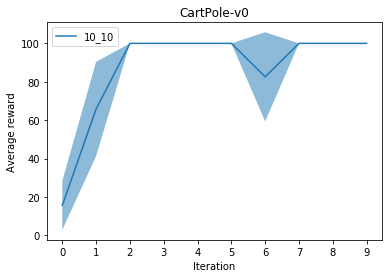

In [21]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import more_itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

expname = "CartPole-v0"
ax = plt.figure().gca()
dir = "data/q5"
iters = list(range(10))
steps = iters


for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
    AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
    StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
    avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
    print(len(avg_return_steps))
    ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
    Label = FolderName[3:8]
    plt.errorbar(steps, avg_return_steps, label=Label)
    plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)
    break
  break

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Learning curves for small batch experiment")

150


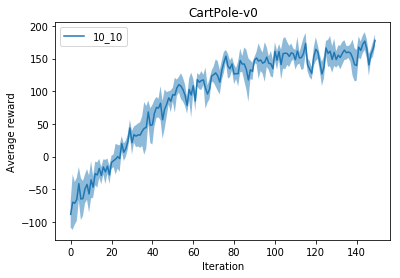

In [20]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import more_itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np

expname = "CartPole-v0"
ax = plt.figure().gca()
dir = "data/q5"
iters = list(range(150))
steps = iters
done = False

for FolderName in os.listdir(dir):
  for FileName in os.listdir(dir+"/"+FolderName):
    if done:
      ea = EventAccumulator(dir+"/"+FolderName+"/"+FileName).Reload()
      AvgReturnList = [e.value for e in ea.Scalars("Eval_AverageReturn")]
      StdReturnList = [e.value for e in ea.Scalars("Eval_StdReturn")]
      avg_return_steps, std_return_steps = AvgReturnList, StdReturnList
      print(len(avg_return_steps))
      ListeUnderScore = list(more_itertools.locate(FolderName, lambda x: x == "_"))
      Label = FolderName[3:8]
      plt.errorbar(steps, avg_return_steps, label=Label)
      plt.fill_between(steps, np.array(avg_return_steps) + np.array(std_return_steps) ,np.array(avg_return_steps) - np.array(std_return_steps), alpha=0.5)
    else:
      done = True

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title(expname)
plt.legend()
plt.savefig("Learning curves for small batch experiment")